In [1]:
# run stopwatch
from _classes import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load Saved Section if exists

### Load libraries, functions, palette, theme

In [2]:
%run _load.ipynb

In [3]:
economics_data = loadit(
    'economics_data', 'data/00-Datasets/'
)

In [4]:
dir = '007.4.1-007.4.2_SOL-Households-food'

In [5]:
save_df = 'data/00-Datasets/'

In [6]:
save_excel = 'data/00-Excel-data/'

# <font color='#2C8B6D'>I. Население</font>

# Section III. Уровень жизни

## 7. Доходы, расходы и условия проживания домашних хозяйств

### 7.4. Потребление продуктов питания в домашних хозяйствах, пищевая и энергетическая ценность продуктов питания в домашних хозяйствах

*Источник: https://rosstat.gov.ru/folder/13397*  
*Единицы измерения: кг*

*Примечания:*  
- *в среднем на потребителя в год*
- *пищевая ценность: гр в сутки*
- *энергетическая ценность: ккал в сутки*

In [7]:
food_link = \
    ('data/02-Population/02-Standard-of-living/05-Households/'
     'potr07_12.xlsx')

In [8]:
food_raw = pd.read_excel(food_link)

In [9]:
food_raw.head(10)

,Обновлено 08.08.2023,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Потребление продуктов питания в домашних хозяй...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"ПОТРЕБЛЕНИЕ, ПИЩЕВАЯ И ЭНЕРГЕТИЧЕСКАЯ ЦЕННОСТЬ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ПИТАНИЯ В ДОМАШНИХ ХОЗЯЙСТВАХ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(в среднем на члена домашнего хозяйcтва),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.000,2022.000
7,Все домашние хозяйства,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Основные продукты питания,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,хлебные продукты,109.0,106.0,113.0,107.0,104.0,101.0,99.0,101.0,99.0,...,96.0,95.0,95.0,99.0,97.0,96.0,95.0,96.0,90.149,90.305


In [10]:
food = food_raw.iloc[6:, :].copy()

In [11]:
food.iloc[0, 0] = 'Тип'

In [12]:
# make header from two rows
food = transform_make_header_from_rows(
    food, rows_index=6)

In [13]:
replace_dict = {
    '\xa0\xa0\xa0': '',
    'белки': 'Белки',
    'жиры': 'Жиры',
    'углеводы': 'Углеводы',
    ', шт.': ''
}
food['Тип'] = food['Тип'].replace(replace_dict, regex=True)

In [14]:
food['Тип'] = [i.strip() for i in food['Тип']]

In [15]:
food['index'] = food['Тип'].copy()

In [16]:
stay_index_list = [
    'Все домашние хозяйства',
    'Домашние хозяйства в городской местности',
    'Домашние хозяйства в сельской местности'
]
for index in food.index:
    if food.loc[index, 'index'] not in stay_index_list:
        food.loc[index, 'index'] = np.NaN

In [17]:
food = transform_fill_values_by_previous(
    data=food, kind='column', column_name='index')

In [18]:
food = food[~food['Тип'].isin(stay_index_list)]

In [19]:
calories_list = [
    'Пищевая ценность', 'Энергетическая ценность',
    'Белки', 'Жиры', 'Углеводы'
]
calories = food[food['Тип'].isin(calories_list)]

In [20]:
food = food[~food['Тип'].isin(calories_list)]

In [21]:
drop_list = ['Основные продукты питания']
food = food[~food['Тип'].isin(drop_list)]

In [22]:
food = food.T.copy()

In [23]:
# make header from two rows
food = transform_make_header_from_rows(
    food, rows_index=['index', 'Тип'], names=['', ''])

In [24]:
food.index.name = None
food.columns.name = None
food.index = [int(i) if not isinstance(i, str) else i for i in food.index]

In [25]:
food = food.astype(float)

In [26]:
food = transform_round(food, 1)

In [27]:
calories = calories.rename(columns={'Тип': 'index1'})

In [28]:
calories_index_list = ['Пищевая ценность']
calories = calories[~calories['index1'].isin(calories_index_list)]

In [29]:
calories = calories.T.copy()

In [30]:
# make header from two rows
calories = transform_make_header_from_rows(
    calories, rows_index=['index', 'index1'], names=[None, None])

In [31]:
calories.index.name = None
calories.columns.name = None
calories.index = [int(i) if not isinstance(i, str) else i for i in calories.index]

In [32]:
calories = calories.astype(float)

In [33]:
calories = transform_round(calories, 1)

In [34]:
isna(food)

There're no NaN values in DataFrame


In [35]:
isna(calories)

There're no NaN values in DataFrame


In [36]:
food.head()

Все домашние хозяйства                                           \
           хлебные продукты картофель овощи и бахчевые фрукты, ягоды   
2003                  109.0      86.0             84.0          36.0   
2004                  106.0      86.0             86.0          39.0   
2005                  113.0      78.0             90.0          51.0   
2006                  107.0      73.0             88.0          53.0   
2007                  104.0      72.0             89.0          58.0   

                                                            \
     мясо и мясопродукты молоко и молочные продукты   яйца   
2003                61.0                      225.0  208.0   
2004                61.0                      227.0  202.0   
2005                64.0                      244.0  209.0   
2006                67.0                      244.0  206.0   
2007                71.0                      246.0  204.0   

                                                       \
     рыба и рыбопродукты сахар и кондитерские изделия   
2003                14.0                         26.0   
2004                15.0                         26.0   
2005                17.0                         34.0   
2006                17.0                         32.0   
2007                18.0                         32.0   

                                       ...  \
     масло растительное и другие Жиры  ...   
2003                             10.0  ...   
2004                             10.0  ...   
2005                             11.0  ...   
2006                             11.0  ...   
2007                             11.0  ...   

     Домашние хозяйства в сельской местности                             \
                            хлебные продукты картофель овощи и бахчевые   
2003                                   134.0     107.0             86.0   
2004                                   133.0     103.0             88.0   
2005                                   136.0     101.0             95.0   
2006                                   130.0      92.0             92.0   
2007                                   126.0      87.0             91.0   

                                                                          \
     фрукты, ягоды мясо и мясопродукты молоко и молочные продукты   яйца   
2003          29.0                55.0                      229.0  189.0   
2004          30.0                55.0                      223.0  182.0   
2005          38.0                56.0                      231.0  185.0   
2006          40.0                59.0                      233.0  184.0   
2007          45.0                63.0                      233.0  189.0   

                                                       \
     рыба и рыбопродукты сахар и кондитерские изделия   
2003                14.0                         30.0   
2004                15.0                         30.0   
2005                17.0                         39.0   
2006                17.0                         37.0   
2007                18.0                         37.0   

                                       
     масло растительное и другие Жиры  
2003                             10.0  
2004                             10.0  
2005                             12.0  
2006                             11.0  
2007                             11.0  

[5 rows x 30 columns]

In [37]:
calories.head()

Все домашние хозяйства                                         \
                      Белки  Жиры Углеводы Энергетическая ценность   
2003                   67.0  89.0    353.0                  2488.0   
2004                   67.0  89.0    346.0                  2458.0   
2005                   71.0  96.0    368.0                  2630.0   
2006                   71.0  95.0    351.0                  2554.0   
2007                   72.0  97.0    347.0                  2564.0   

     Домашние хозяйства в городской местности                 \
                                        Белки  Жиры Углеводы   
2003                                     65.0  89.0    329.0   
2004                                     65.0  89.0    323.0   
2005                                     70.0  96.0    345.0   
2006                                     70.0  96.0    329.0   
2007                                     71.0  98.0    327.0   

                             Домашние хозяйства в сельской местности        \
     Энергетическая ценность                                   Белки  Жиры   
2003                  2383.0                                    72.0  88.0   
2004                  2360.0                                    71.0  87.0   
2005                  2539.0                                    74.0  95.0   
2006                  2469.0                                    73.0  94.0   
2007                  2482.0                                    74.0  97.0   

                                       
     Углеводы Энергетическая ценность  
2003    420.0                  2773.0  
2004    413.0                  2731.0  
2005    430.0                  2876.0  
2006    410.0                  2785.0  
2007    403.0                  2786.0

In [38]:
get_data_two_level(calories, level1='Белки').head()

,Все домашние хозяйства,Домашние хозяйства в городской местности,Домашние хозяйства в сельской местности
2003,67.0,65.0,72.0
2004,67.0,65.0,71.0
2005,71.0,70.0,74.0
2006,71.0,70.0,73.0
2007,72.0,71.0,74.0


<Axes: >

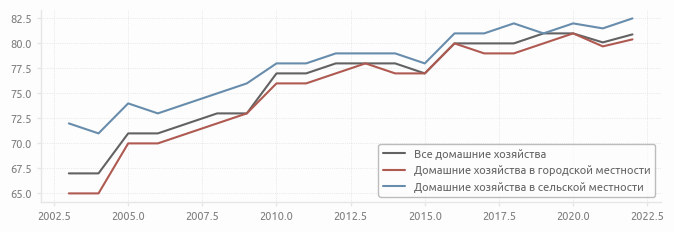

In [39]:
get_data_two_level(calories, level1='Белки').plot()

In [40]:
get_data_two_level(food, level1='хлебные продукты').head()

,Все домашние хозяйства,Домашние хозяйства в городской местности,Домашние хозяйства в сельской местности
2003,109.0,100.0,134.0
2004,106.0,96.0,133.0
2005,113.0,104.0,136.0
2006,107.0,99.0,130.0
2007,104.0,95.0,126.0


<Axes: >

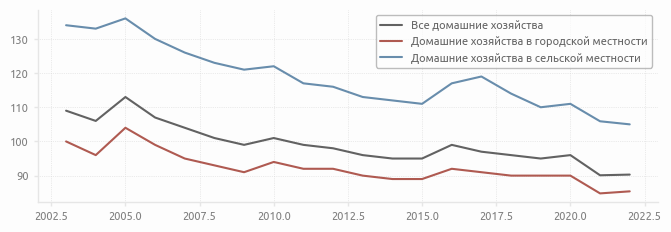

In [41]:
get_data_two_level(food, level1='хлебные продукты').plot()

<Axes: >

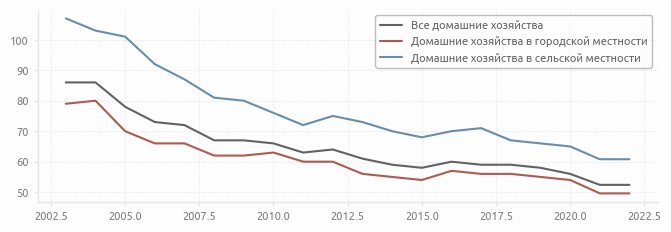

In [42]:
get_data_two_level(food, level1='картофель').plot()

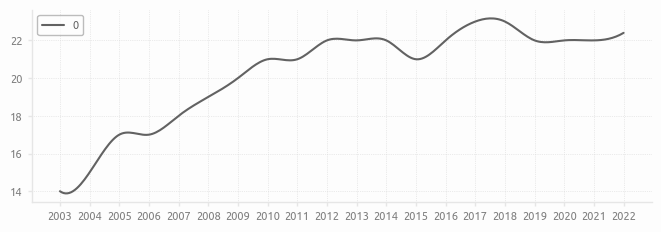

In [43]:
smoothed(get_data_two_level(food, level1='рыба и рыбопродукты'), return_type='df').plot()
plt.xticks(ticks=get_data_two_level(food, level1='рыба и рыбопродукты').index);

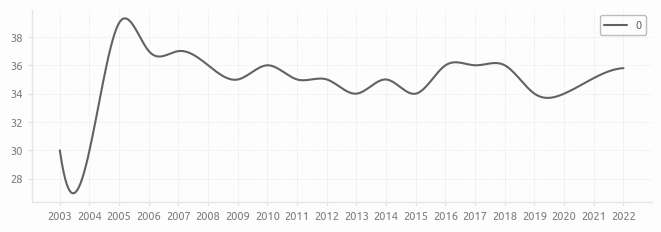

In [44]:
smoothed(get_data_two_level(food, level1='сахар и кондитерские изделия'), return_type='df').plot()
plt.xticks(ticks=get_data_two_level(food, level1='сахар и кондитерские изделия').index);

##### <font color='#AF4035'> Export Dataset to Excel

In [45]:
saveit_excel(
    data=food,
    filename=dir,
    path=save_excel,
    sheet='Структура продуктов питания'
)

'Структура продуктов питания' sheet created if file '01020502-SOL-Households-food.xlsx'


In [46]:
saveit_excel(
    data=calories,
    filename=dir,
    path=save_excel,
    sheet='Энергетическая ценность'
)

'Энергетическая ценность' sheet created if file '01020502-SOL-Households-food.xlsx'


### Save Dataset

In [47]:
economics_data['7.4.1'] = food

In [48]:
economics_data['7.4.2'] = calories

In [49]:
saveit(
    file=economics_data,
    name='economics_data',
    dir=save_df
)

File 'economics_data' saved in directory 'data/00-Datasets/'


### Save Session

In [51]:
save_session(dir)

### Execution time

In [50]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 0:00:15
